In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Kütüphaneler yüklendi!")

Kütüphaneler yüklendi!


In [2]:
df = pd.read_csv('data/train.csv')

print(f"Satır sayısı: {df.shape[0]}")
print(f"Kolon sayısı: {df.shape[1]}")
print(f"\nKolonlar: {df.columns.tolist()}")

Satır sayısı: 891
Kolon sayısı: 12

Kolonlar: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("=== VERİ TİPLERİ ===")
print(df.dtypes)

print("\n=== EKSİK DEĞERLER ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
missing_df = pd.DataFrame({'Eksik Sayı': missing, 'Yüzde %': missing_pct})
print(missing_df[missing_df['Eksik Sayı'] > 0])

=== VERİ TİPLERİ ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

=== EKSİK DEĞERLER ===
          Eksik Sayı  Yüzde %
Age              177     19.9
Cabin            687     77.1
Embarked           2      0.2


In [5]:
print("=== SAYISAL KOLONLAR ===")
df.describe()

=== SAYISAL KOLONLAR ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Age — medyan ile doldur
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked — mod ile doldur (en sık görülen değer)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin — çok eksik, "kabin var mı?" diye yeni kolon yap
df['Cabin_Known'] = df['Cabin'].notna().astype(int)
df.drop('Cabin', axis=1, inplace=True)

# Gereksiz kolonları sil
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print("Temizlik sonrası eksik değerler:")
print(df.isnull().sum())
print(f"\nKalan kolon sayısı: {df.shape[1]}")
print(f"Kolonlar: {df.columns.tolist()}")

Temizlik sonrası eksik değerler:
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Cabin_Known    0
dtype: int64

Kalan kolon sayısı: 9
Kolonlar: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_Known']


In [7]:
# Aile büyüklüğü
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Yalnız mı?
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Yaş grupları
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 12, 18, 35, 60, 100],
                        labels=['Çocuk', 'Genç', 'Yetişkin', 'Orta Yaş', 'Yaşlı'])

print(df[['FamilySize', 'IsAlone', 'AgeGroup']].head(10))
print(f"\nYaş grubu dağılımı:\n{df['AgeGroup'].value_counts()}")

   FamilySize  IsAlone  AgeGroup
0           2        0  Yetişkin
1           2        0  Orta Yaş
2           1        1  Yetişkin
3           2        0  Yetişkin
4           1        1  Yetişkin
5           1        1  Yetişkin
6           1        1  Orta Yaş
7           5        0     Çocuk
8           3        0  Yetişkin
9           2        0      Genç

Yaş grubu dağılımı:
AgeGroup
Yetişkin    535
Orta Yaş    195
Genç         70
Çocuk        69
Yaşlı        22
Name: count, dtype: int64


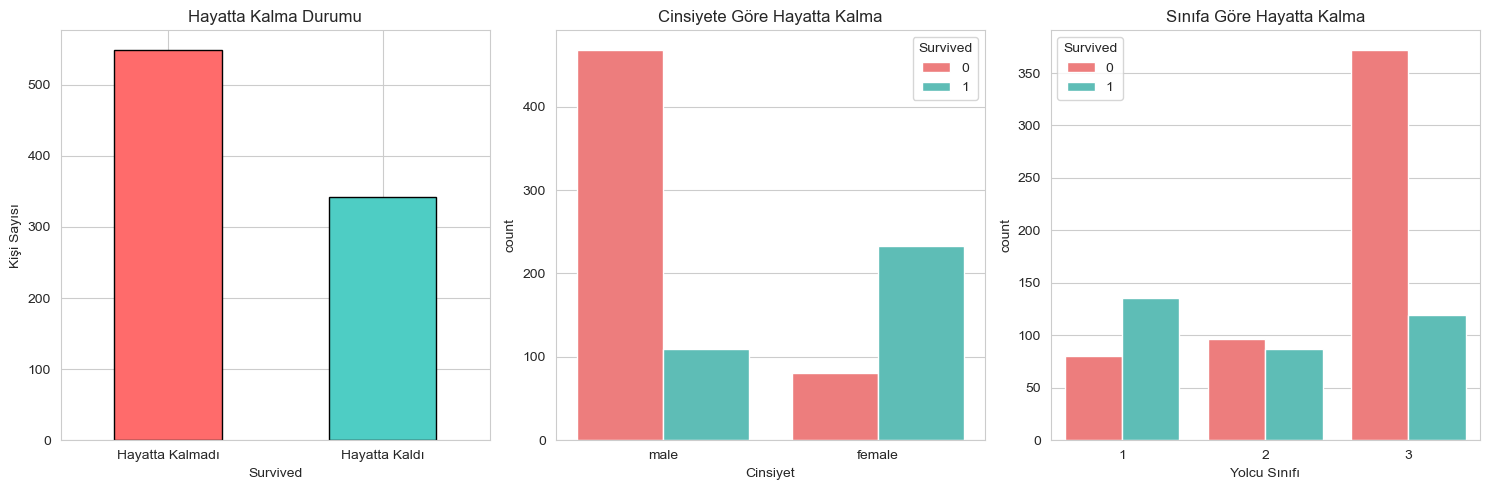

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Genel hayatta kalma
df['Survived'].value_counts().plot(kind='bar', ax=axes[0],
    color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
axes[0].set_title('Hayatta Kalma Durumu')
axes[0].set_xticklabels(['Hayatta Kalmadı', 'Hayatta Kaldı'], rotation=0)
axes[0].set_ylabel('Kişi Sayısı')

# Cinsiyete göre
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[1],
              palette=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Cinsiyete Göre Hayatta Kalma')
axes[1].set_xlabel('Cinsiyet')

# Sınıfa göre
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[2],
              palette=['#FF6B6B', '#4ECDC4'])
axes[2].set_title('Sınıfa Göre Hayatta Kalma')
axes[2].set_xlabel('Yolcu Sınıfı')

plt.tight_layout()
plt.savefig('images/survival_overview.png', dpi=150, bbox_inches='tight')
plt.show()

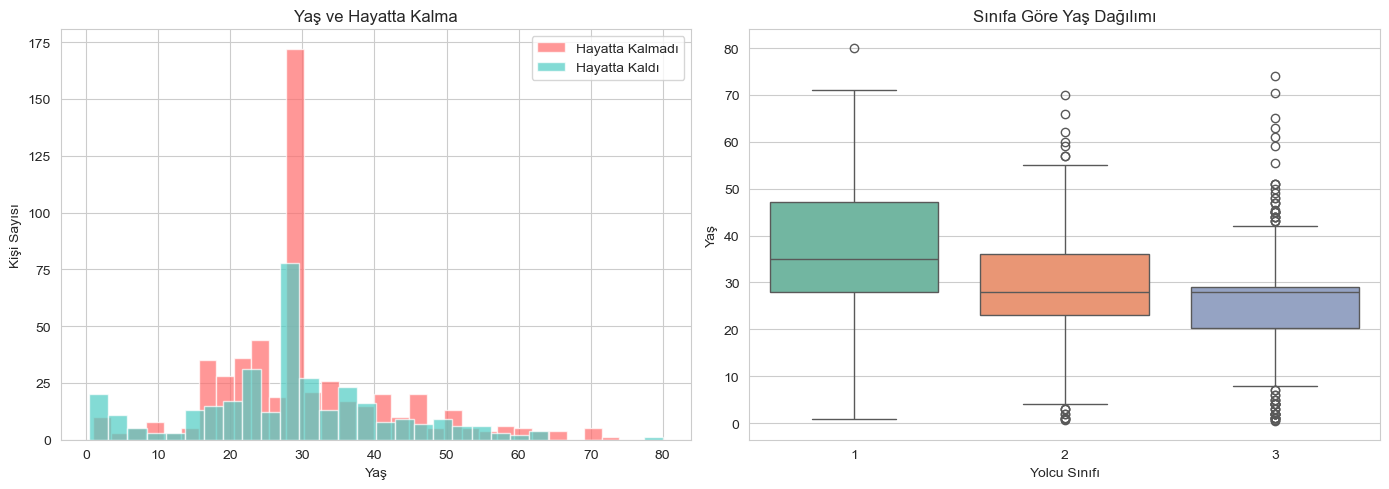

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[df['Survived']==0]['Age'], alpha=0.7, 
             label='Hayatta Kalmadı', color='#FF6B6B', bins=30)
axes[0].hist(df[df['Survived']==1]['Age'], alpha=0.7, 
             label='Hayatta Kaldı', color='#4ECDC4', bins=30)
axes[0].set_xlabel('Yaş')
axes[0].set_ylabel('Kişi Sayısı')
axes[0].set_title('Yaş ve Hayatta Kalma')
axes[0].legend()

# Kutu grafiği
sns.boxplot(data=df, x='Pclass', y='Age', ax=axes[1], palette='Set2')
axes[1].set_title('Sınıfa Göre Yaş Dağılımı')
axes[1].set_xlabel('Yolcu Sınıfı')
axes[1].set_ylabel('Yaş')

plt.tight_layout()
plt.savefig('images/age_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

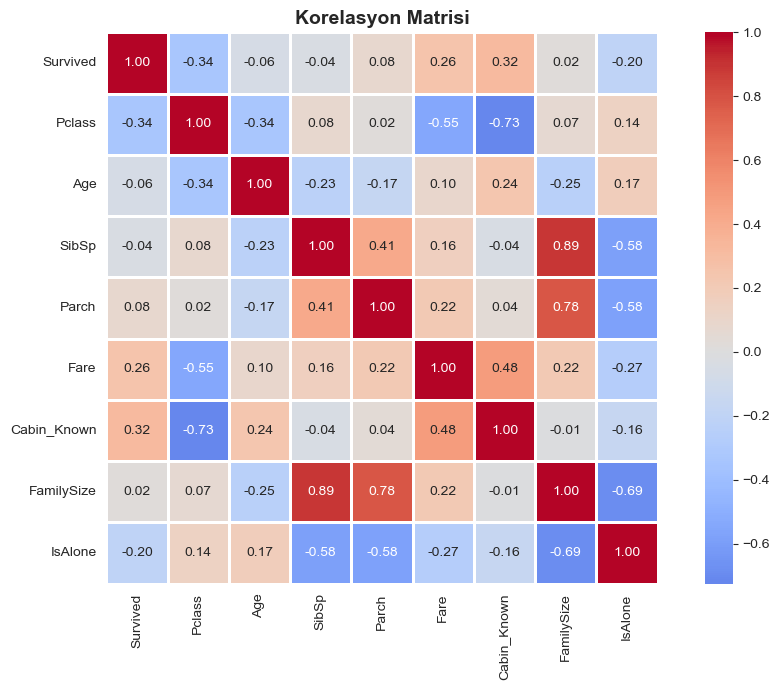

In [10]:
plt.figure(figsize=(10, 7))

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)

plt.title('Korelasyon Matrisi', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

In [11]:
print("=== CİNSİYETE GÖRE HAYATTA KALMA ===")
print(df.groupby('Sex')['Survived'].agg(['mean', 'sum', 'count']).round(3))

print("\n=== SINIFA GÖRE HAYATTA KALMA ===")
print(df.groupby('Pclass')['Survived'].agg(['mean', 'sum', 'count']).round(3))

print("\n=== CİNSİYET x SINIF PIVOT TABLO ===")
pivot = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print(pivot.round(3))

=== CİNSİYETE GÖRE HAYATTA KALMA ===
         mean  sum  count
Sex                      
female  0.742  233    314
male    0.189  109    577

=== SINIFA GÖRE HAYATTA KALMA ===
         mean  sum  count
Pclass                   
1       0.630  136    216
2       0.473   87    184
3       0.242  119    491

=== CİNSİYET x SINIF PIVOT TABLO ===
Sex     female   male
Pclass               
1        0.968  0.369
2        0.921  0.157
3        0.500  0.135


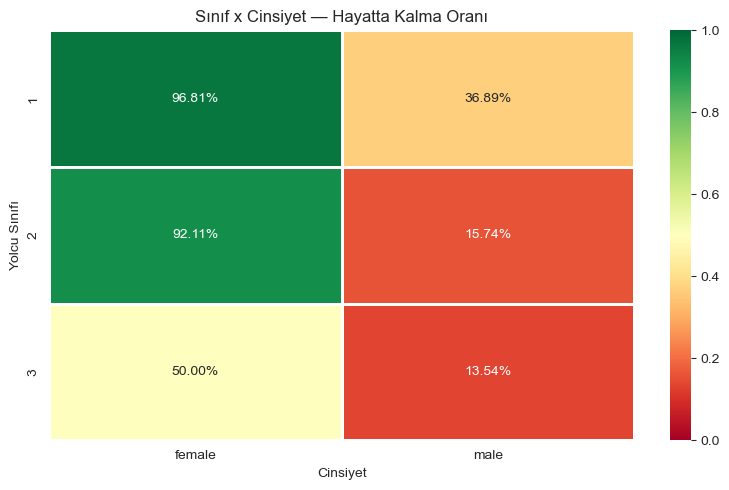

In [12]:
pivot = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt='.2%', cmap='RdYlGn',
            linewidths=1, vmin=0, vmax=1)
plt.title('Sınıf x Cinsiyet — Hayatta Kalma Oranı')
plt.xlabel('Cinsiyet')
plt.ylabel('Yolcu Sınıfı')
plt.tight_layout()
plt.savefig('images/survival_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("Sklearn kütüphaneleri yüklendi!")

Sklearn kütüphaneleri yüklendi!


In [18]:
# Hedef değişken — tahmin etmek istediğimiz şey
y = df['Survived']

# Özellikler — tahmin için kullanacağımız kolonlar
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Cabin_Known']]

print(f"X boyutu: {X.shape}")
print(f"y boyutu: {y.shape}")
print(f"\nÖzellikler:\n{X.head()}")

X boyutu: (891, 7)
y boyutu: (891,)

Özellikler:
   Pclass     Sex   Age     Fare  FamilySize  IsAlone  Cabin_Known
0       3    male  22.0   7.2500           2        0            0
1       1  female  38.0  71.2833           2        0            1
2       3  female  26.0   7.9250           1        1            0
3       1  female  35.0  53.1000           2        0            1
4       3    male  35.0   8.0500           1        1            0


In [20]:
# Sex kolonunu sayıya çevir (male=0, female=1)
X = X.copy()
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti: {X_train.shape[0]} satır")
print(f"Test seti: {X_test.shape[0]} satır")

Eğitim seti: 712 satır
Test seti: 179 satır


In [21]:
# Modeli oluştur
model = DecisionTreeClassifier(random_state=42)

# Modeli eğit
model.fit(X_train, y_train)

print("Model eğitildi")

Model eğitildi


In [22]:
# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Doğruluk oranını hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.2%}")

# İlk 10 tahmini gerçekle karşılaştır
comparison = pd.DataFrame({
    'Gerçek': y_test.values[:10],
    'Tahmin': y_pred[:10]
})
print(f"\nİlk 10 tahmin:\n{comparison}")

Model Doğruluğu: 63.69%

İlk 10 tahmin:
   Gerçek  Tahmin
0       1       0
1       0       0
2       0       1
3       1       1
4       1       0
5       1       1
6       1       0
7       0       0
8       1       0
9       1       1


In [23]:
# Daha iyi model — derinliği sınırla
model_v2 = DecisionTreeClassifier(max_depth=4, random_state=42)
model_v2.fit(X_train, y_train)

y_pred_v2 = model_v2.predict(X_test)
accuracy_v2 = accuracy_score(y_test, y_pred_v2)

print(f"Model v1 Doğruluğu: {accuracy:.2%}")
print(f"Model v2 Doğruluğu: {accuracy_v2:.2%}")

Model v1 Doğruluğu: 63.69%
Model v2 Doğruluğu: 70.95%


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Modeli oluşturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitme
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Doğruluğu: {accuracy_v2:.2%}")
print(f"Random Forest Doğruluğu: {accuracy_rf:.2%}")

Decision Tree Doğruluğu: 70.95%
Random Forest Doğruluğu: 70.95%


In [25]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Doğruluğu: {accuracy_v2:.2%}")
print(f"Random Forest Doğruluğu: {accuracy_rf:.2%}")

Decision Tree Doğruluğu: 70.95%
Random Forest Doğruluğu: 76.54%
